# 데이터의 기본 정보 요약

## 필수 라이브러리 로딩

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 한글 문자열은 항상 유니코드 설정 : 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

## 데이터셋 로딩

In [9]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')

### 요약정보 확인

In [10]:
chipo.shape

(4622, 5)

In [11]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [12]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [13]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- order_id : 주문번호
- quantity :  수량
- item_name : 메뉴
- choice_description : 토핑
- item_price : 가격

In [14]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [15]:
# 수치 데이터의 기초 통계량 분석
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [16]:
# order_id는 숫자의 의미를 가지고 있다고 볼 수 없다.
chipo['order_id'] = chipo['order_id'].astype(str)

In [26]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [18]:
# unique()
len(chipo['item_name'].unique())

50

In [27]:
len(chipo['order_id'].unique())

1834

# 인사이트의 발견 : 탐색적 데이터 분석

## 가장 많이 주문한 메뉴는 무엇일까?

In [20]:
# value_counts() : 내림차순으로 정렬되서 반환된다.
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [21]:
# top 10
# items()
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [22]:
chipo['item_name'].value_counts().index.tolist()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Steak Bowl',
 'Chips',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa',
 'Chicken Salad Bowl',
 'Canned Soda',
 'Side of Chips',
 'Veggie Burrito',
 'Barbacoa Burrito',
 'Veggie Bowl',
 'Carnitas Bowl',
 'Barbacoa Bowl',
 'Carnitas Burrito',
 'Steak Soft Tacos',
 '6 Pack Soft Drink',
 'Chips and Tomatillo Red Chili Salsa',
 'Chicken Crispy Tacos',
 'Chips and Tomatillo Green Chili Salsa',
 'Carnitas Soft Tacos',
 'Steak Crispy Tacos',
 'Chips and Tomatillo-Green Chili Salsa',
 'Steak Salad Bowl',
 'Nantucket Nectar',
 'Barbacoa Soft Tacos',
 'Chips and Roasted Chili Corn Salsa',
 'Izze',
 'Chips and Tomatillo-Red Chili Salsa',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Chicken Salad',
 'Veggie Soft Tacos',
 'Carnitas Crispy Tacos',
 'Veggie Salad',
 'Carnitas Salad Bowl',
 'Burrito',
 'Steak

In [25]:
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


## item당 주문 개수와 총수량은 얼마일까?

In [33]:
# count() : NaN을 제외한 개수를 구하는 함수
# sum()
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [36]:
# 주문 총량
order_sum = chipo.groupby('item_name')['quantity'].sum()
order_sum

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


**메뉴별 주문총량의 시각화**

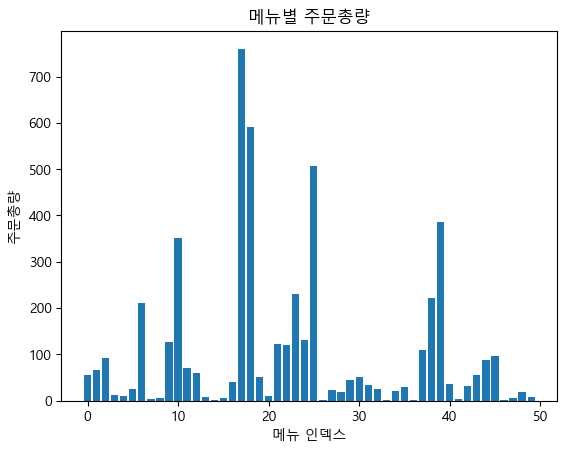

In [37]:
item_name_list = order_sum.index.tolist()
x = np.arange(len(item_name_list))
y = order_sum.values.tolist()

plt.title('메뉴별 주문총량')
plt.bar(x, y)
plt.xlabel('메뉴 인덱스')
plt.ylabel('주문총량')

plt.show()

## 메뉴별 가격

In [39]:
# 주문수량이 1개인 제품을 대상으로 계산
one_item = chipo[chipo.quantity == 1]
price_item = one_item.groupby('item_name').min()
price_item.sort_values('item_price', ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


가격 분포 시각화

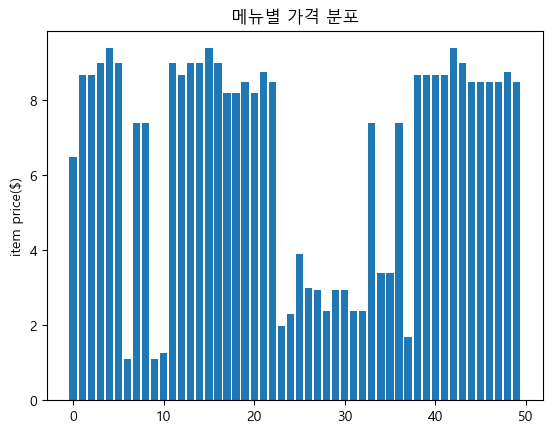

In [40]:
item_name_list = price_item.index.tolist()
x = np.arange(len(item_name_list))
item_price = price_item['item_price'].tolist()

plt.title('메뉴별 가격 분포')
plt.bar(x, item_price)
plt.ylabel('item price($)')

plt.show()

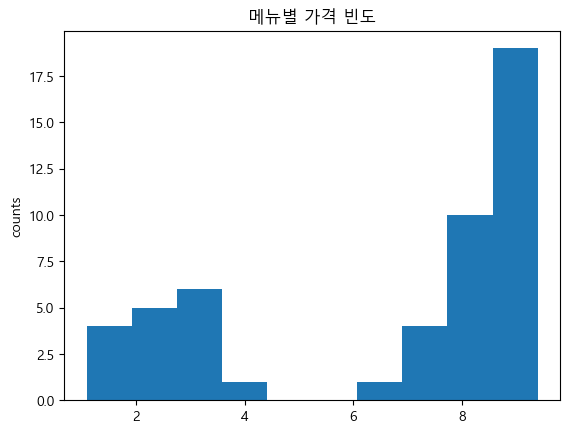

In [41]:
# 메뉴별 가격의 히스토그램
plt.hist(item_price)
plt.ylabel('counts')
plt.title('메뉴별 가격 빈도')
plt.show()

**가장 비싼 메뉴는 총 몇개 팔렸는지 구하시오.**

In [47]:
chipo.loc[chipo.item_name=='Steak Salad Bowl','quantity'].sum()

31

## 주문 당 평균 계산금액